In [45]:
import random
import cv2
import matplotlib.pyplot as plt
import numpy as np
import albumentations as A
from urllib.request import urlopen
import numpy as np
import cv2
from matplotlib import pyplot as plt
import albumentations as albu

In [9]:
def show(image):
    plt.figure(figsize=(6, 6))
    plt.imshow(image)

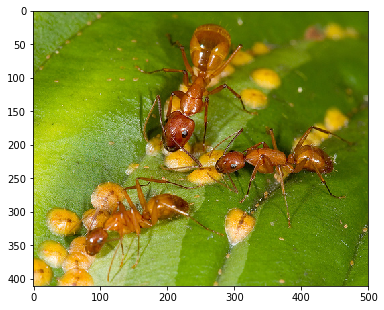

In [10]:
image = cv2.imread('hymenoptera/test/ants/1440002809_b268d9a66a.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
show(image)

In [11]:
transform = A.Compose([
    A.RandomCrop(256, 256),
    A.OneOf([
        A.RGBShift(), 
        A.HueSaturationValue()
    ]),
])
#print(transform)

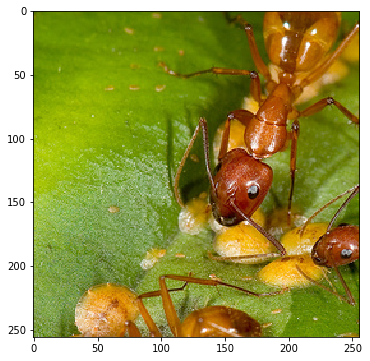

In [12]:
random.seed(42)
augmented_image_1 = transform(image=image)['image']
show(augmented_image_1)


In [13]:
from albumentations import (
    HorizontalFlip, IAAPerspective, ShiftScaleRotate, CLAHE, RandomRotate90,
    Transpose, ShiftScaleRotate, Blur, OpticalDistortion, GridDistortion, HueSaturationValue,
    IAAAdditiveGaussianNoise, GaussNoise, MotionBlur, MedianBlur, RandomBrightnessContrast, IAAPiecewiseAffine,
    IAASharpen, IAAEmboss, Flip, OneOf, Compose
)

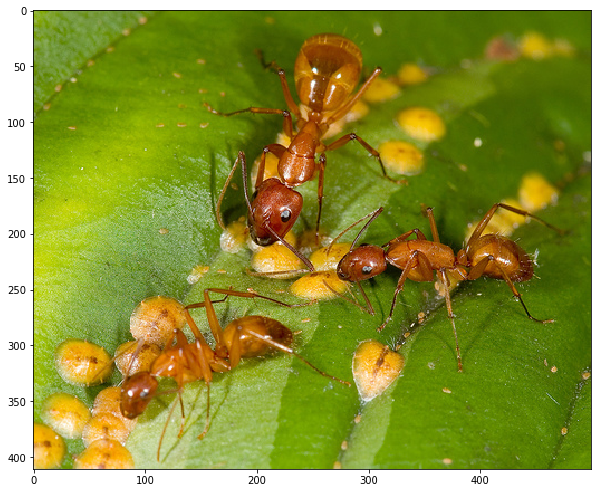

In [24]:
image = cv2.imread('hymenoptera/test/ants/1440002809_b268d9a66a.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.show()

In [25]:
def augment_and_show(aug, image):
    image = aug(image=image)['image']
    plt.figure(figsize=(10, 10))
    plt.imshow(image)

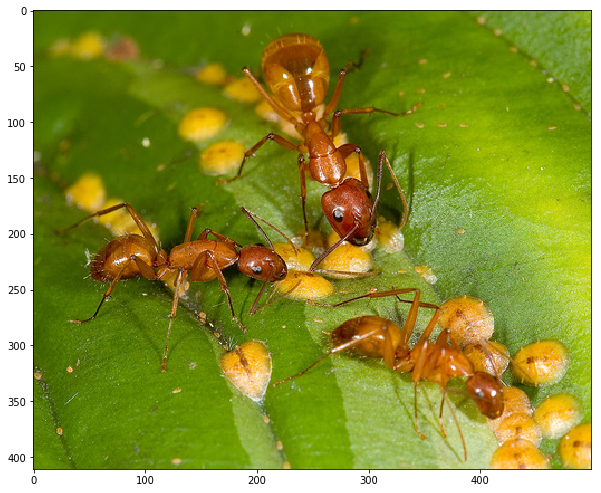

In [26]:
aug = HorizontalFlip(p=1)
augment_and_show(aug, image)

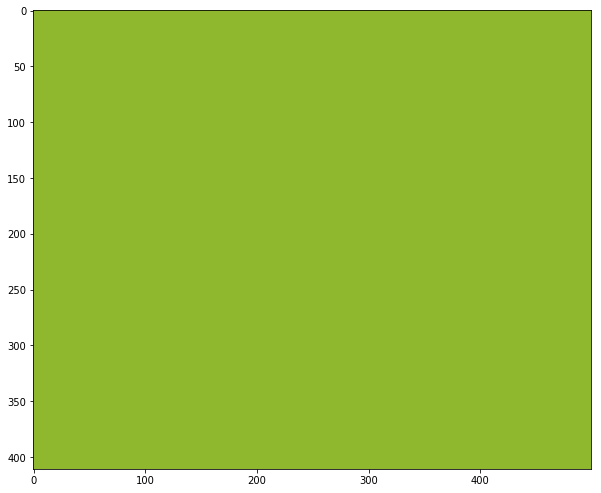

In [27]:
aug = IAAPerspective(scale=0.2, p=1)
augment_and_show(aug, image)

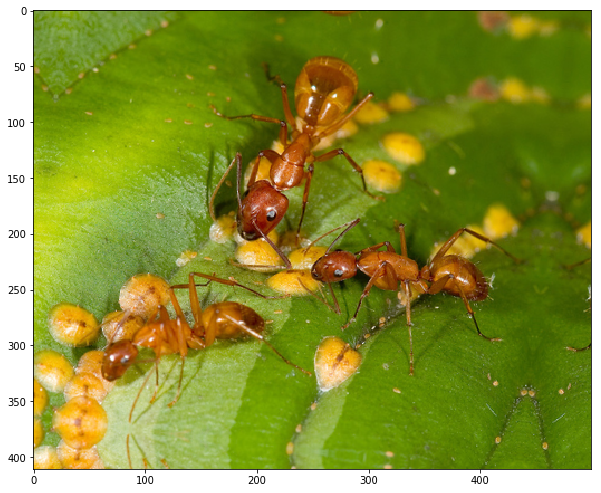

In [28]:
aug = ShiftScaleRotate(p=1)
augment_and_show(aug, image)

In [33]:
def augment_flips_color(p=.5):
    return Compose([
        CLAHE(),RandomRotate90(), Transpose(),
        ShiftScaleRotate(shift_limit=0.0625, scale_limit=0.50, rotate_limit=45, p=.75),
        Blur(blur_limit=3),OpticalDistortion(),GridDistortion(), HueSaturationValue()], p=p)

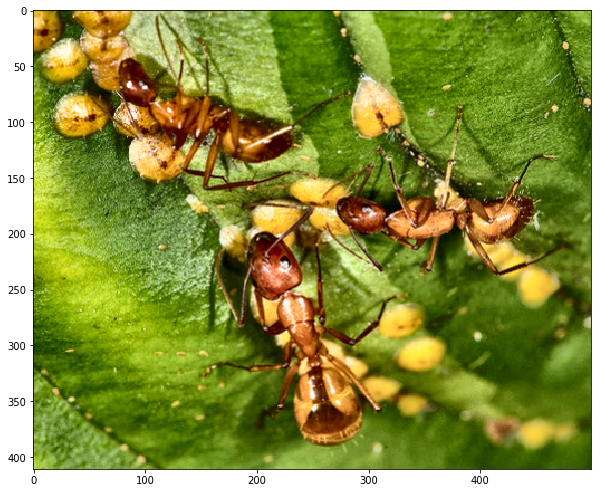

In [34]:
aug = augment_flips_color(p=1)
augment_and_show(aug, image)

In [35]:
def strong_aug(p=.5):
    return Compose([RandomRotate90(),Flip(), Transpose(),
        OneOf([ IAAAdditiveGaussianNoise(),GaussNoise(),], p=0.2),
        OneOf([ MotionBlur(p=.2), MedianBlur(blur_limit=3, p=0.1),
            Blur(blur_limit=3, p=0.1),], p=0.2),
        ShiftScaleRotate(shift_limit=0.0625, scale_limit=0.2, rotate_limit=45, p=0.2),
        OneOf([OpticalDistortion(p=0.3),GridDistortion(p=.1),IAAPiecewiseAffine(p=0.3),]
              ,p=0.2),
        OneOf([ CLAHE(clip_limit=2), IAASharpen(),IAAEmboss(),RandomBrightnessContrast(),],
              p=0.3),HueSaturationValue(p=0.3), ], p=p)

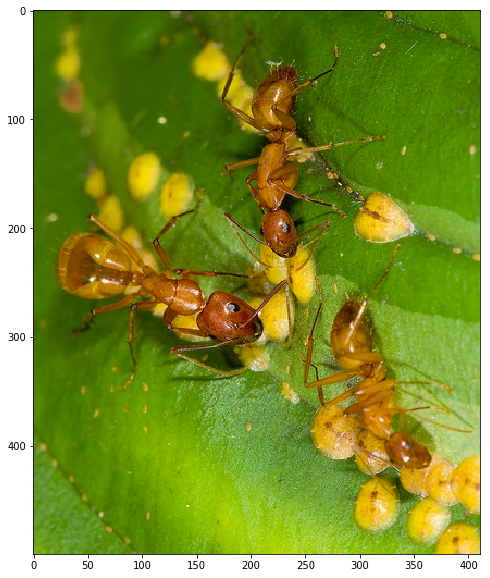

In [36]:
aug = strong_aug(p=1)
augment_and_show(aug, image)

In [37]:
def vis_points(image, points, diameter=15):
    im = image.copy()
    for (x, y) in points:
        cv2.circle(im, (int(x), int(y)), diameter, (0, 255, 0), -1)
    plt.imshow(im)

In [39]:
def create_transformer(transformations):
    return albu.Compose(transformations,p=1,
                        keypoint_params={'format': 'xy'})(image=image, keypoints=points)

In [48]:
points = [(100, 100), (72, 40), (110, 40), (170, 30), 
          (300, 41), (150, 50), (56, 80), (130, 70), 
          (90, 140), (91, 78), (67, 67), (83, 67), 
          (100, 67), (115, 67), (82, 90), (100, 90)]


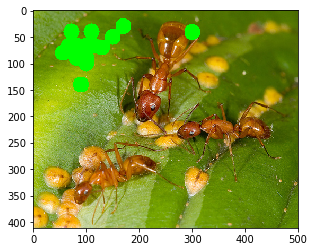

In [49]:
vis_points(image, points)

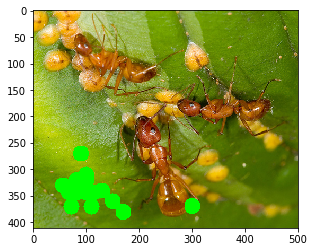

In [50]:
transformed = create_transformer([albu.VerticalFlip(p=1)])
keypoints = transformed['keypoints']
im = transformed['image']
vis_points(im, keypoints)

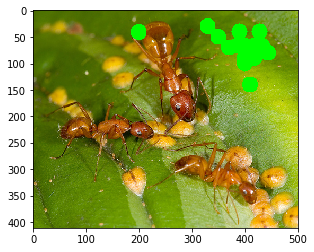

In [51]:
transformed = create_transformer([albu.HorizontalFlip(p=1)])
keypoints = transformed['keypoints']
im = transformed['image']
vis_points(im, keypoints)

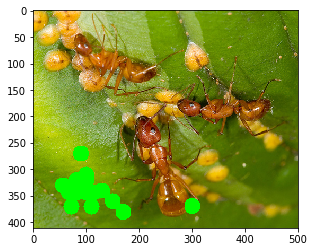

In [52]:
transformed = create_transformer([albu.Flip(p=1)])
keypoints = transformed['keypoints']
im = transformed['image']
vis_points(im, keypoints)

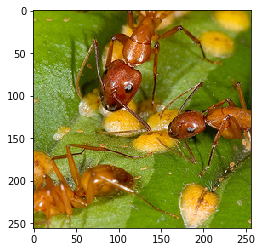

In [53]:
transformed = create_transformer([albu.RandomCrop(width=256, height=256, p=1)])
keypoints = transformed['keypoints']
im = transformed['image']
vis_points(im, keypoints)

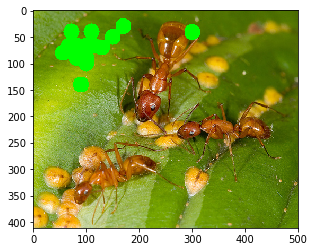

In [54]:
transformed = create_transformer([albu.RandomRotate90(p=1)])
keypoints = transformed['keypoints']
im = transformed['image']
vis_points(im, keypoints)

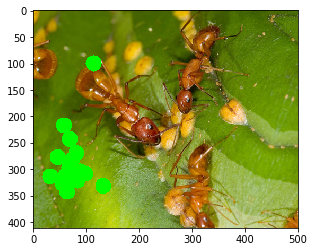

In [55]:
transformed = create_transformer([albu.Rotate(p=1)])
keypoints = transformed['keypoints']
im = transformed['image']
vis_points(im, keypoints)

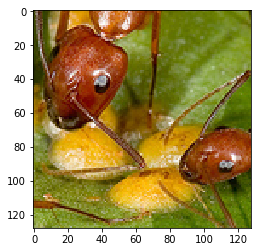

In [56]:
transformed = create_transformer([albu.CenterCrop(height=128, width=128, p=1)])
keypoints = transformed['keypoints']
im = transformed['image']
vis_points(im, keypoints)

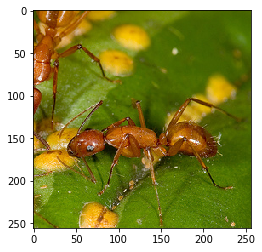

In [57]:
transformed = create_transformer([albu.RandomSizedCrop(min_max_height=(256, 256),
                                                       height=256, width=256, p=1)])
keypoints = transformed['keypoints']
im = transformed['image']
vis_points(im, keypoints)

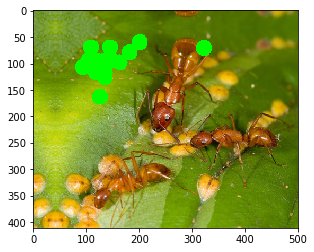

In [58]:
transformed = create_transformer([albu.ShiftScaleRotate(p=1)])
keypoints = transformed['keypoints']
im = transformed['image']
vis_points(im, keypoints)

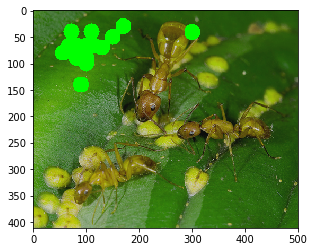

In [59]:
transformed = create_transformer([albu.RandomSizedCrop(min_max_height=(256, 1025),
   height=512, width=512, p=0.5), albu.HorizontalFlip(p=0.5),
    albu.OneOf([albu.HueSaturationValue(p=0.5),albu.RGBShift(p=0.7)], p=1), 
                                  albu.RandomBrightnessContrast(p=0.5)])
keypoints = transformed['keypoints']
im = transformed['image']
vis_points(im, keypoints)